In [ ]:
# !pip install -U scikit-learn

### **7 inputs training model with policies introduced**

In [ ]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  ...  OVAR15  OVAR21  OVAR24  OVAR40
DATE                                 ...                                
31DEC19  KOR    NaN  31DEC19    NaN  ...     NaN     NaN     NaN     NaN
01JAN20  KOR    NaN  01JAN20    NaN  ...     0.0     0.0     0.0     0.0
02JAN20  KOR    NaN  02JAN20    NaN  ...     0.0     0.0     0.0     0.0
03JAN20  KOR    NaN  03JAN20    NaN  ...     0.0     0.0     0.0     0.0
04JAN20  KOR    NaN  04JAN20    NaN  ...     0.0     0.0     0.0     0.0

[5 rows x 16 columns]

In [ ]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [ ]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  ...  OVAR15  OVAR21  OVAR24  OVAR40
DATE                                   ...                                
23JAN20  KOR    1.0 2020-01-23    0.0  ...     0.0     0.0     0.0     0.0
24JAN20  KOR    2.0 2020-01-24    0.0  ...     0.0     0.0     0.0     0.0
25JAN20  KOR    2.0 2020-01-25    0.0  ...     0.0     0.0     0.0     0.0
26JAN20  KOR    3.0 2020-01-26    0.0  ...     0.0     0.0     0.0     0.0
27JAN20  KOR    4.0 2020-01-27    0.0  ...     0.0     0.0     0.0     0.0

[5 rows x 16 columns]

In [ ]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR1  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5
DATE                                                    
23JAN20    1.0    0.0    0.0    1.0    0.0    0.0    0.0
24JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0
25JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0
26JAN20    3.0    0.0    0.0    3.0    0.0    0.0    0.0
27JAN20    4.0    0.0    0.0    4.0    0.0    0.0    0.0

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3, 4,5, 6]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [16, 24]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1

plt.savefig('7_variables_graph.png')
pyplot.show()

#### **LSTM DATA PREPARATION**

In [ ]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 7)


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 7
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
reframed.drop(reframed.columns[[25 ,26, 27]], axis=1, inplace=True)
print(reframed.shape)

# 24 input features and 8 output features 

(534, 25)


In [ ]:
reframed.head()

var1(t-3)  var2(t-3)  var3(t-3)  ...  var2(t)  var3(t)   var4(t)
3  -1.000000       -1.0       -1.0  ...     -1.0     -1.0 -0.999779
4  -0.999988       -1.0       -1.0  ...     -1.0     -1.0 -0.999668
5  -0.999988       -1.0       -1.0  ...     -1.0     -1.0 -0.999668
6  -0.999977       -1.0       -1.0  ...     -1.0     -1.0 -0.999668
7  -0.999965       -1.0       -1.0  ...     -1.0     -1.0 -0.999668

[5 rows x 25 columns]

In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (400, 25)
Testing data shape:  (134, 25)


In [ ]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -4:]
test_X, test_y = test[:, :n_obs], test[:, -4:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

21
Training split shape:  (400, 21) 400 (400, 4)
Testing split shape:  (134, 21) 134 (134, 4)


In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 7) (400, 4) (134, 3, 7) (134, 4)


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(164, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

model.add(Bidirectional(LSTM(164, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# 1st layer 164, 2nd layer 164

# model.add(LSTM(32, activation="tanh"))
model.add(Dense(train_y.shape[1]))

adam = tf.keras.optimizers.Adam()
ear_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=100,  # best is 100
    mode='min', restore_best_weights=True
)
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=30)  # factor is 0.4 patience 30
model.compile(loss=tf.losses.MeanAbsoluteError(),
              metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)
# model.compile(loss=tf.losses.MeanSquaredError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=108, validation_data=(test_X, test_y), verbose=2, shuffle=False)  # batch_size  best 108   -> shuffle False


Epoch 1/4500
4/4 - 8s - loss: 0.6279 - mean_absolute_error: 0.6279 - val_loss: 0.4542 - val_mean_absolute_error: 0.4542
Epoch 2/4500
4/4 - 0s - loss: 0.3152 - mean_absolute_error: 0.3152 - val_loss: 0.3897 - val_mean_absolute_error: 0.3897
Epoch 3/4500
4/4 - 0s - loss: 0.2218 - mean_absolute_error: 0.2218 - val_loss: 0.3719 - val_mean_absolute_error: 0.3719
Epoch 4/4500
4/4 - 0s - loss: 0.1177 - mean_absolute_error: 0.1177 - val_loss: 0.3810 - val_mean_absolute_error: 0.3810
Epoch 5/4500
4/4 - 0s - loss: 0.1703 - mean_absolute_error: 0.1703 - val_loss: 0.3626 - val_mean_absolute_error: 0.3626
Epoch 6/4500
4/4 - 0s - loss: 0.1200 - mean_absolute_error: 0.1200 - val_loss: 0.3159 - val_mean_absolute_error: 0.3159
Epoch 7/4500
4/4 - 0s - loss: 0.1121 - mean_absolute_error: 0.1121 - val_loss: 0.3002 - val_mean_absolute_error: 0.3002
Epoch 8/4500
4/4 - 0s - loss: 0.1008 - mean_absolute_error: 0.1008 - val_loss: 0.2870 - val_mean_absolute_error: 0.2870
Epoch 9/4500
4/4 - 0s - loss: 0.0857 - m

In [ ]:
# model.save('/content/drive/MyDrive/Korea university work/publication/7_variables_rmse_4854')
# from tensorflow import keras
# model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/7_variables_rmse_4854')

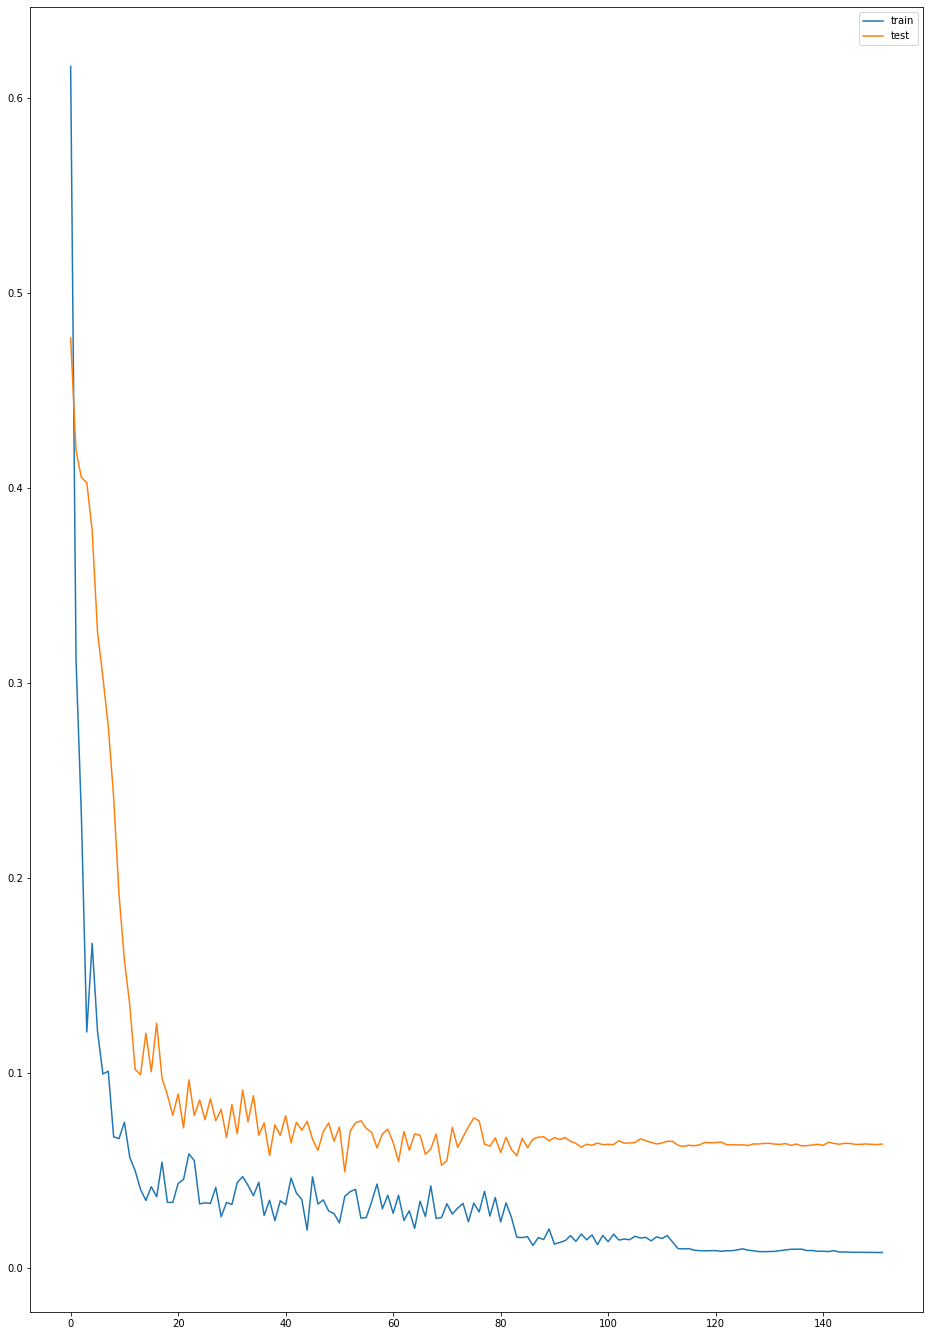

In [ ]:
# plot history

pyplot.figure()
pyplot.rcParams['figure.figsize'] = [7, 6]
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 21)
yhat :  (134, 4)


In [ ]:
inv_yhat = concatenate((yhat, test_X[:, -3:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, :4] 

test_y = test_y.reshape((len(test_y), 4))
inv_y = concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 16234

Test RMSE: 4854.734


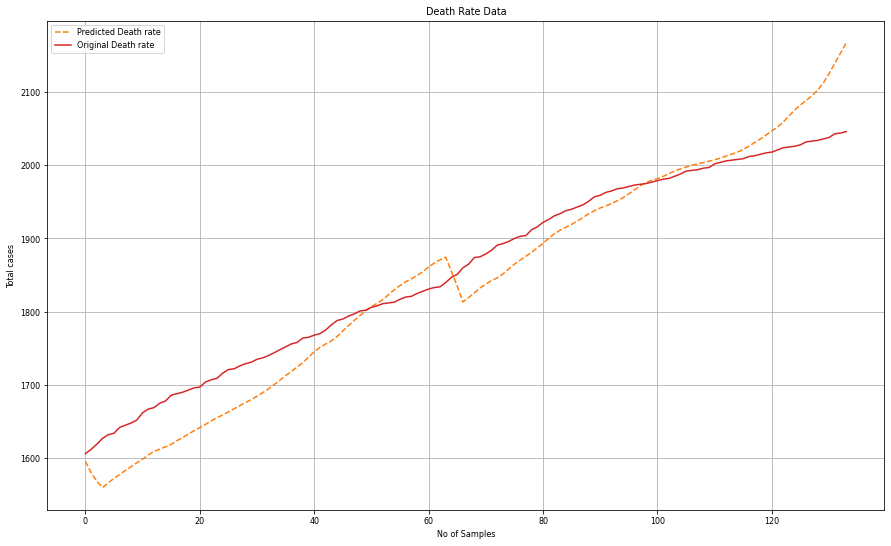

In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 1], color='tab:orange', label='Predicted Death rate', linestyle='dashed')
ax.plot(dd, inv_y[:, 1], color='tab:red', label='Original Death rate')

# Same as above
ax.set_xlabel('No of Samples')
ax.set_ylabel('Total cases')
ax.set_title('Death Rate Data')
ax.grid(True)
ax.legend(loc='upper left');
plt.savefig('7_Input_Variables_out.png')

### **Fitting model on training data**

In [ ]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)

(400, 21)


In [ ]:
inv_yhat_train = concatenate((yhat_train, train_X[:, -3:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, :4] 

train_y = train_y.reshape((len(train_y), 4))
inv_y_train = concatenate((train_y, train_X[:, -3:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Test RMSE: %.3f' % rmse)
# best rmse 4212

Test RMSE: 1725.624


# Combining both training and test data

In [ ]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 4)

####**PLotting graphs**

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted Positive rate", "Predicted Death rate", "Predicted Recovered rate",  "Predicted No of Quarantined"]
L20 = ["Original Positive rate", "Original Death rate", "Original Recovered rate", "Original No of Quarantined"]
L21 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]


In [ ]:
plt.rc('font', size=10)
fig, ax = plt.subplots(4, figsize=(15, 32))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
for i in range(4):
  ax[i].plot(comb_p[:, i], color='tab:orange', label=L22[i], linestyle='dashed')
  ax[i].plot(comb_d[:, i], color='tab:red', label=L20[i])

  # Same as above
  ax[i].set_xlabel('No of Samples')
  ax[i].set_ylabel('Total cases')
  ax[i].set_title(L21[i])
  ax[i].grid(True)
  ax[i].legend(loc='upper left');

plt.savefig('7_Input_Variables_out.png')

In [ ]:
# !pip install -U scikit-learn

     |████████████████████████████████| 23.1 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.049253896
Total Error MAE:  2722.2537
Error in percentage MAPE: 0.16934296
Total Error MAPE:  0.034861557
Test RMSE: 4854.734


### **Training on 8 inputs Params**

In [1]:
#import required packages
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
import tensorflow as tf

from keras.regularizers import l2, l1
from numpy import load
from numpy import loadtxt
from numpy import nan
from numpy import isnan
from numpy import count_nonzero
from numpy import unique
from numpy import array
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import SGDRegressor
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]
# df_columns = ["DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "IDNAME", "Country"]
df_columns = [ "DATE", "MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"]

# ISO3 is a country variable

# df_columns = ["MVAR1", "MVAR2", "MVAR3", "MVAR4", "OVAR1", "OVAR3", "OVAR5", "OVAR7", "OVAR9", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR28", "OVAR29", "OVAR40", "IDNAME", "Country"]

# MVAR1 -> Total positive/confirmed
# MVAR2 -> Total death
# MVAR3 -> Total recovered
# MVAR4 -> No of people quarantined


#read the data
df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_world_n.csv", header=0, usecols=df_columns)
# df.reset_index(drop=True)
df.index = df['DATE']
# df = pd.read_csv("/content/drive/MyDrive/Korea university work/publication/dataset/covid_korea_n.csv", header=0)

dd = df[df["ISO3"] == "KOR"]
# sk = df["Country"] == "Republic of Korea"
dd = dd[:560]
dd.head()

ISO3  MVAR1     DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7  \
DATE                                                                            
31DEC19  KOR    NaN  31DEC19    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
01JAN20  KOR    NaN  01JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
02JAN20  KOR    NaN  02JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
03JAN20  KOR    NaN  03JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   
04JAN20  KOR    NaN  04JAN20    NaN    NaN    NaN    0.0    0.0    0.0    0.0   

         OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                     
31DEC19     NaN     NaN     NaN     NaN     NaN     NaN  
01JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
02JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
03JAN20     0.0     0.0     0.0     0.0     0.0     0.0  
04JAN20     0.0     0.0     0.0     0.0     0.0     0.0

In [2]:
ddf = dd.dropna()
print("AFter dropping: ", len(ddf))
print("Original data: ", len(dd))
print("Original data shape: ", ddf.shape)

AFter dropping:  537
Original data:  560
Original data shape:  (537, 16)


In [3]:
def parse(x):
	return datetime.strptime(x, '%d%b%y')

ddf["DATE"] = ddf["DATE"].apply(parse)
# target is AVAR1 which is newly confirmed cases
ddf.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ISO3  MVAR1       DATE  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  \
DATE                                                                       
23JAN20  KOR    1.0 2020-01-23    0.0    0.0    1.0    0.0    0.0    0.0   
24JAN20  KOR    2.0 2020-01-24    0.0    0.0    2.0    0.0    0.0    0.0   
25JAN20  KOR    2.0 2020-01-25    0.0    0.0    2.0    0.0    0.0    0.0   
26JAN20  KOR    3.0 2020-01-26    0.0    0.0    3.0    0.0    0.0    0.0   
27JAN20  KOR    4.0 2020-01-27    0.0    0.0    4.0    0.0    0.0    0.0   

         OVAR7  OVAR11  OVAR13  OVAR15  OVAR21  OVAR24  OVAR40  
DATE                                                            
23JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
24JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
26JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
27JAN20    0.0     0.0     0.0     0.0     0.0     0.0     0.0

In [4]:
# Replacing OVAR7, OVAR15, OVAR21 values with binary values. 
ddf["OVAR7"].replace({0: 0, 2: 1, 3: 2, 4: 3}, inplace=True)
ddf["OVAR15"].replace({0: 0, 2: 1, 3: 2}, inplace=True)
ddf["OVAR21"].replace({0: 0, 2: 1}, inplace=True)

date = ddf["DATE"]
ddf.drop(columns=["DATE", "OVAR11", "OVAR13", "OVAR15", "OVAR21", "OVAR24", "OVAR40", "ISO3"], axis=1, inplace=True)
ddf.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MVAR1  MVAR2  MVAR3  MVAR4  OVAR1  OVAR3  OVAR5  OVAR7
DATE                                                           
23JAN20    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0
24JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0
25JAN20    2.0    0.0    0.0    2.0    0.0    0.0    0.0    0.0
26JAN20    3.0    0.0    0.0    3.0    0.0    0.0    0.0    0.0
27JAN20    4.0    0.0    0.0    4.0    0.0    0.0    0.0    0.0

In [5]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = ddf.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [15, 35]
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(ddf.columns[group], y=0.5, loc='right')
	i += 1

plt.savefig('8_variables_graph.png')
pyplot.show()

#### **LSTM DATA PREPARATION 2**

In [6]:
import numpy as np
# ddf = ddf.astype(np.int64)

# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

dataset = ddf
values = dataset.values

print("Dataset shape after cleaning: ", values.shape)
# X_scaler = MinMaxScaler()
# Y_scaler = MinMaxScaler()
# # X_scaler = MinMaxScaler(feature_range=(0, 1))
# # X_data = X_scaler.fit_transform(values)
# X_data = X_scaler.fit_transform(values)
# Y_data = Y_scaler.fit_transform(dataset[['MVAR1']])

# Y_data = Y_scaler.fit_transform(data[['traffic_volume']]) 

Dataset shape after cleaning:  (537, 8)


In [7]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
# values = dataset.values
# integer encode direction
values = values.astype('float32')

# encoder = LabelEncoder()
# values = encoder.fit_transform(values)
# ensure all data is float

# normalize features
# scaler = MinMaxScaler(feature_range=(0, 4))
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = StandardScaler()
scaled = scaler.fit_transform(values)
# specify the number of lag hours
n_hours = 3
n_features = 8
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
# we will add below line if we just want to forecast one variable for 1 day. 
reframed.drop(reframed.columns[[28, 29, 30, 31]], axis=1, inplace=True)

print(reframed.shape)

# 24 input features and 8 output features 

(534, 28)


In [8]:
reframed.head()

var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3  -1.000000       -1.0       -1.0  -1.000000       -1.0       -1.0   
4  -0.999988       -1.0       -1.0  -0.999889       -1.0       -1.0   
5  -0.999988       -1.0       -1.0  -0.999889       -1.0       -1.0   
6  -0.999977       -1.0       -1.0  -0.999779       -1.0       -1.0   
7  -0.999965       -1.0       -1.0  -0.999668       -1.0       -1.0   

   var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  ...  var3(t-1)  var4(t-1)  \
3       -1.0       -1.0  -0.999988       -1.0  ...       -1.0  -0.999889   
4       -1.0       -1.0  -0.999988       -1.0  ...       -1.0  -0.999779   
5       -1.0       -1.0  -0.999977       -1.0  ...       -1.0  -0.999668   
6       -1.0       -1.0  -0.999965       -1.0  ...       -1.0  -0.999668   
7       -1.0       -1.0  -0.999965       -1.0  ...       -1.0  -0.999668   

   var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)   var1(t)  var2(t)  var3(t)  \
3       -1.0       -1.0       -1.0       -1.0 -0.999977     -1.0     -1.0   
4       -1.0       -1.0       -1.0       -1.0 -0.999965     -1.0     -1.0   
5       -1.0       -1.0       -1.0       -1.0 -0.999965     -1.0     -1.0   
6       -1.0       -1.0       -1.0       -1.0 -0.999965     -1.0     -1.0   
7       -1.0       -1.0       -1.0       -1.0 -0.999965     -1.0     -1.0   

    var4(t)  
3 -0.999779  
4 -0.999668  
5 -0.999668  
6 -0.999668  
7 -0.999668  

[5 rows x 28 columns]

In [9]:
# split into train and test sets
values = reframed.values
n_train_hours = 400
# n_train_hours = 472
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)


Training data shape:  (400, 28)
Testing data shape:  (134, 28)


In [10]:
# split into input and outputs
n_obs = n_hours * n_features
print(n_obs)
train_X, train_y = train[:, :n_obs], train[:, -4:]
test_X, test_y = test[:, :n_obs], test[:, -4:]
print("Training split shape: ", train_X.shape, len(train_X), train_y.shape)
print("Testing split shape: ", test_X.shape, len(test_X), test_y.shape)


# Here we are taking previous 14 days data so it becomes like 14 * 14 (features) and the output is 14 which is different then the input

24
Training split shape:  (400, 24) 400 (400, 4)
Testing split shape:  (134, 24) 134 (134, 4)


In [11]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# (total data, time steps/total days, total features)

(400, 3, 8) (400, 4) (134, 3, 8) (134, 4)


In [ ]:
# model = Sequential()
# model.add(Bidirectional(LSTM(164, return_sequences=True, activation='tanh'), input_shape=(train_X.shape[1], train_X.shape[2]), merge_mode="concat"))
# # model.add(Bidirectional(LSTM(124, return_sequences=True, activation='tanh'), merge_mode="concat"))

# model.add(Bidirectional(LSTM(164, activation='tanh'), merge_mode="concat"))  # best neurons 164 or 124
# # 1st layer 164, 2nd layer 164

# # model.add(LSTM(32, activation="tanh"))
# model.add(Dense(train_y.shape[1]))

# adam = tf.keras.optimizers.Adam()
# ear_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=100,  # best is 100
#     mode='min', restore_best_weights=True
# )
# # rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=30)  # best
# rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=30)  # factor is 0.4 patience 30 0.1
# model.compile(loss=tf.losses.MeanAbsoluteError(),
#               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)
# # model.compile(loss=tf.losses.MeanSquaredError(),
# #               metrics=[tf.metrics.MeanAbsoluteError()], optimizer=adam)

# history = model.fit(train_X, train_y, epochs=4500, callbacks = [ear_stop, rlrop], batch_size=110, validation_data=(test_X, test_y), verbose=2, shuffle=False)  # batch_size  best 108   -> shuffle True

Epoch 1/4500
4/4 - 8s - loss: 0.6194 - mean_absolute_error: 0.6194 - val_loss: 0.4774 - val_mean_absolute_error: 0.4774
Epoch 2/4500
4/4 - 0s - loss: 0.3200 - mean_absolute_error: 0.3200 - val_loss: 0.4359 - val_mean_absolute_error: 0.4359
Epoch 3/4500
4/4 - 0s - loss: 0.2533 - mean_absolute_error: 0.2533 - val_loss: 0.3812 - val_mean_absolute_error: 0.3812
Epoch 4/4500
4/4 - 0s - loss: 0.1329 - mean_absolute_error: 0.1329 - val_loss: 0.3741 - val_mean_absolute_error: 0.3741
Epoch 5/4500
4/4 - 0s - loss: 0.1849 - mean_absolute_error: 0.1849 - val_loss: 0.3505 - val_mean_absolute_error: 0.3505
Epoch 6/4500
4/4 - 0s - loss: 0.1366 - mean_absolute_error: 0.1366 - val_loss: 0.2927 - val_mean_absolute_error: 0.2927
Epoch 7/4500
4/4 - 0s - loss: 0.1364 - mean_absolute_error: 0.1364 - val_loss: 0.2565 - val_mean_absolute_error: 0.2565
Epoch 8/4500
4/4 - 0s - loss: 0.0961 - mean_absolute_error: 0.0961 - val_loss: 0.2530 - val_mean_absolute_error: 0.2530
Epoch 9/4500
4/4 - 0s - loss: 0.1050 - m

In [12]:
# model.save('/content/drive/MyDrive/Korea university work/publication/8_Input_variables_rmse_2950')
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Korea university work/publication/8_Input_variables_rmse_2950')

In [ ]:
# plot history
pyplot.figure()
pyplot.rcParams['figure.figsize'] = [7, 6]
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('8_Input_Variables_Loss.png')
pyplot.show()


In [13]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(test_X.shape)
print("yhat : ", yhat.shape)

(134, 24)
yhat :  (134, 4)


In [14]:
inv_yhat = concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, :4] 

test_y = test_y.reshape((len(test_y), 4))
inv_y = concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
# best rmse 2950

Test RMSE: 2950.545


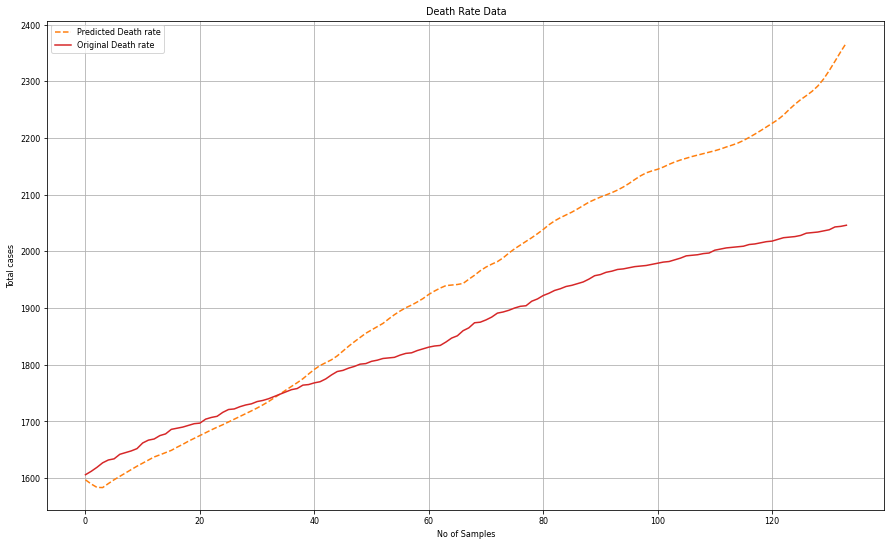

In [ ]:
dd = np.arange(134)
dd.shape

plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(15, 9))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
ax.plot(dd, inv_yhat[:, 1], color='tab:orange', label='Predicted Death rate', linestyle='dashed')
ax.plot(dd, inv_y[:, 1], color='tab:red', label='Original Death rate')

# Same as above
ax.set_xlabel('No of Samples')
ax.set_ylabel('Total cases')
ax.set_title('Death Rate Data')
ax.grid(True)
ax.legend(loc='upper left');
plt.savefig('8_Input_Variables_out.png')

### **Fitting model on training data**

In [ ]:

# make a prediction
yhat_train = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], n_hours*n_features))
print(train_X.shape)

(400, 24)


In [ ]:
inv_yhat_train = concatenate((yhat_train, train_X[:, -4:]), axis=1)
inv_yhat_train = scaler.inverse_transform(inv_yhat_train)
inv_yhat_train = inv_yhat_train[:, :4] 

train_y = train_y.reshape((len(train_y), 4))
inv_y_train = concatenate((train_y, train_X[:, -4:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:, :4]

# inv_yhat = scaler.inverse_transform(yhat)
# test_y = test_y.reshape((len(test_y), 4))  # we need to change reshape value here. 
# inv_y = scaler.inverse_transform(test_y)
rmse = sqrt(mean_squared_error(inv_y_train, inv_yhat_train))
print('Test RMSE: %.3f' % rmse)
# best rmse 4212

Test RMSE: 1464.200


# Combining both training and test data

In [ ]:
comb_d = np.concatenate((inv_y_train, inv_y))
comb_p = np.concatenate((inv_yhat_train, inv_yhat))
comb_p.shape

(534, 4)

####**PLotting graphs**

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]

In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=25)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 0], color='tab:red', label=L22[0], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 0], color='tab:green', label=L20[0], linewidth=4)
ax2.plot(comb_p[:, 1], color='tab:red', label=L22[1], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 1], color='tab:green', label=L20[1],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel("Positive Cases")
ax1.set_title(L21[0])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 25})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel("Death Cases")
ax2.set_title(L21[1])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("8_var_out_1.png",dpi=200)

In [ ]:
L44 = ["Predicted Positive rate", "Original Positive rate", "Predicted Death rate", "Original Death rate", "Predicted Recovered rate", "Original Recovered rate", "Predicted No of Quarantined", "Original No of Quarantined"]
L41 = ["Positive rate Data", "Death rate Data", "Recovered Patient Data", "No of People Quarantined" ]

L22 = ["Predicted New Cases", "Predicted New Death Cases", "Predicted New Recovered Cases", "Predicted New Quarantined\n                Cases"]
L20 = ["Original Positive Cases", "Original Death Cases", "Original Recovered Cases", "Original Quarantined Cases"]
L23 = ["Positive Cases", "Death Cases", "Recovered Cases", "Quarantined Cases" ]
L21 = ["Corona Positive Cases Data", "Corona Death Cases Data", "Corona Recovered Patient Data", "Corona Quarantined Cases Data" ]


In [ ]:
from matplotlib.pyplot import figure
plt.rc('font', size=24)

plt.rcParams["figure.figsize"] = (27,9)

fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
ax1.plot(comb_p[:, 2], color='tab:red', label=L22[2], linestyle='dashed', linewidth=8)
ax1.plot(comb_d[:, 2], color='tab:green', label=L20[2], linewidth=4)
ax2.plot(comb_p[:, 3], color='tab:red', label=L22[3], linestyle='dashed', linewidth=8)
ax2.plot(comb_d[:, 3], color='tab:green', label=L20[3],  linewidth=4)

# Adding text on the plot.
ax1.axvline(x=400, color='b', linestyle='-.')
ax2.axvline(x=400, color='b', linestyle='-.')
ax1.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax1.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})
ax2.text(250, 13, 'Training', style='italic', fontsize=20, bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 7})
ax2.text(450, 13, 'Testing', style='italic',fontsize=20, bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 7})

ax1.set_xlabel('Day')
ax1.set_ylabel(L23[2])
ax1.set_title(L21[2])
ax1.grid(True)
ax1.legend(loc='upper left');

plt.rcParams.update({'font.size': 22})
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels

ax1.locator_params(axis="x", nbins=20)
ax1.locator_params(axis="y", nbins=20)
ax2.locator_params(axis="x", nbins=20)
ax2.locator_params(axis="y", nbins=20)

# ax.set_xlim([420, 450])
# ax.set_ylim([5000, 9000])

ax2.set_xlabel('Day')
ax2.set_ylabel(L23[3])
ax2.set_title(L21[3])
ax2.grid(True)
ax2.legend(loc='upper left');

plt.savefig("8_var_out_2.png",dpi=200)

In [31]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error
mae = MAE(inv_yhat[:, 2], inv_y[:, 2])
print("Total Error MAE: ", mae)

Total Error MAE:  3375.0193


In [28]:
rmse = sqrt(mean_squared_error(inv_y[:, 3], inv_yhat[:, 3]))
print('Test RMSE: %.2f' % rmse)

Test RMSE: 490.50


In [30]:
mape = mean_absolute_percentage_error(inv_yhat[:, 2], inv_y[:, 2])
print("Total Error MAPE: ", mape)

Total Error MAPE:  0.027486743


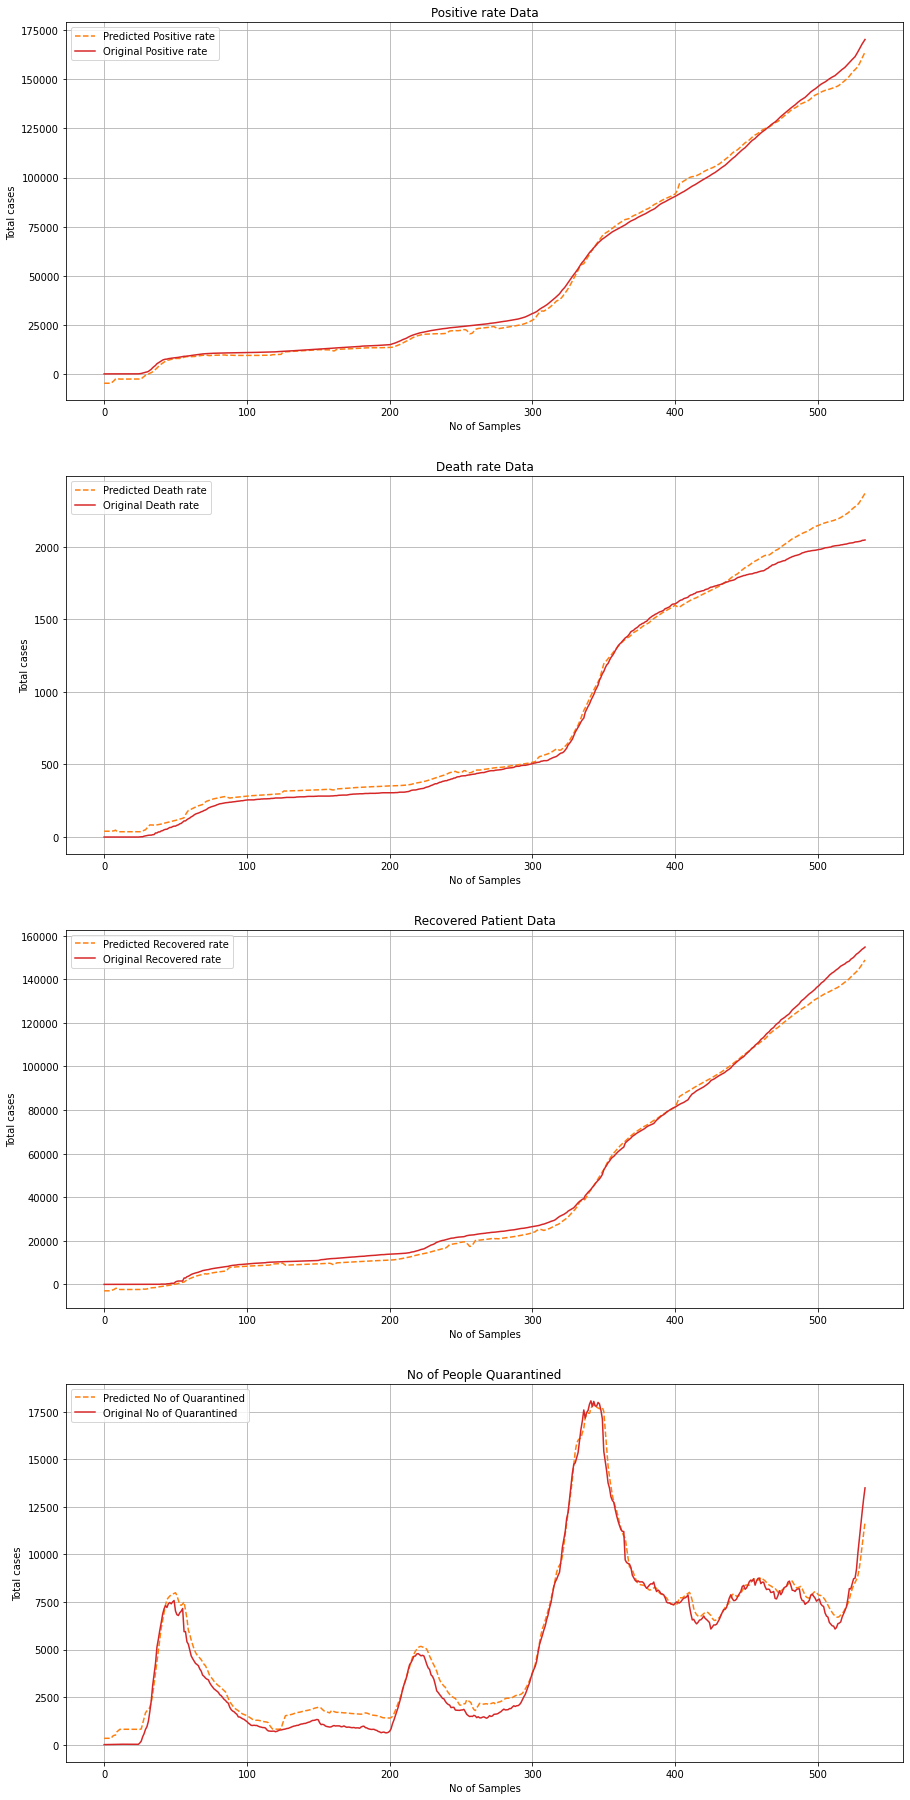

In [ ]:
plt.rc('font', size=10)
fig, ax = plt.subplots(4, figsize=(15, 32))

# Specify how our lines should look
# ax.plot(inv_yhat, color='tab:orange', label='Death rate')
for i in range(4):
  ax[i].plot(comb_p[:, i], color='tab:orange', label=L22[i], linestyle='dashed')
  ax[i].plot(comb_d[:, i], color='tab:red', label=L20[i])

  # Same as above
  ax[i].set_xlabel('No of Samples')
  ax[i].set_ylabel('Total cases')
  ax[i].set_title(L21[i])
  ax[i].grid(True)
  ax[i].legend(loc='upper left');

plt.savefig('8_variables_out_resultV1.png')

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(yhat, test_y)
print("Error in percentage MAE:", mae)
mae = MAE(inv_yhat, inv_y)
print("Total Error MAE: ", mae)

mape = mean_absolute_percentage_error(yhat, test_y)
print("Error in percentage MAPE:", mape)
mape = mean_absolute_percentage_error(inv_yhat, inv_y)
print("Total Error MAPE: ", mape)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Error in percentage MAE: 0.055684242
Total Error MAE:  1812.7201
Error in percentage MAPE: 0.17878562
Total Error MAPE:  0.03669016
Test RMSE: 2950.545
